### Five different models to predict breast cancer: regular logistic regression,logistic regression with TensorFlow, Random Forest decision tree, Support Vector Machine for classification, neural network for classification

### Table of contents

- [Preprocessing of the data](#preprocessing)
- [Regular logistic regression](#regular_logistic)
- [Logistic regression with TensorFlow](#logistic_w/_tensorflow)
- [Random Forest decision tree](#random_forest)
- [Support Vector Machine](#svm)
- [Neural network with Keras](#neural_network_w/_keras)

<a id='preprocessing'></a>
### I. Preprocessing of the data.

(1) Load the data.

In [4]:
import pandas as pd
df=pd.read_csv("breast_cancer.csv")
df

,id,class,cell1_radius,cell1_texture,cell1_perimeter,cell1_area,cell1_smoothness,cell1_compactness,cell1_concavity,cell1_concave_pts,...,cell3_radius,cell3_texture,cell3_perimeter,cell3_area,cell3_smoothness,cell3_compactness,cell3_concavity,cell3_concave_pts,cell3_symmetry,cell3_fractal_dim
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The dataset was cleaned in Excel. There are some tasks that are faster and more convenient to perform in Excel.

The "id" column has no predictive value. So, let's drop it.

(2) Drop the "id" column.

In [5]:
df=df.drop(["id"],axis=1)
df.head()

,class,cell1_radius,cell1_texture,cell1_perimeter,cell1_area,cell1_smoothness,cell1_compactness,cell1_concavity,cell1_concave_pts,cell1_symmetry,...,cell3_radius,cell3_texture,cell3_perimeter,cell3_area,cell3_smoothness,cell3_compactness,cell3_concavity,cell3_concave_pts,cell3_symmetry,cell3_fractal_dim
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(3) Separate the predictor variables and target variables.

In [6]:
# predictor variables
X=df.drop(["class"],axis=1)
X.head()

,cell1_radius,cell1_texture,cell1_perimeter,cell1_area,cell1_smoothness,cell1_compactness,cell1_concavity,cell1_concave_pts,cell1_symmetry,cell1_fractal_dim,...,cell3_radius,cell3_texture,cell3_perimeter,cell3_area,cell3_smoothness,cell3_compactness,cell3_concavity,cell3_concave_pts,cell3_symmetry,cell3_fractal_dim
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# target variable
y=df[["class"]]
y.head()

,class
0,M
1,M
2,M
3,M
4,M


(4) Standardize the predictor variables.

In [8]:
from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=names)
X.head()


,cell1_radius,cell1_texture,cell1_perimeter,cell1_area,cell1_smoothness,cell1_compactness,cell1_concavity,cell1_concave_pts,cell1_symmetry,cell1_fractal_dim,...,cell3_radius,cell3_texture,cell3_perimeter,cell3_area,cell3_smoothness,cell3_compactness,cell3_concavity,cell3_concave_pts,cell3_symmetry,cell3_fractal_dim
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Let's see how many unique classes are in the target variable.

In [9]:
import numpy as np
np.unique(y)

array(['B', 'M'], dtype=object)

There are only two unique classes in the target variable. So, there is going to be a binary classification task.

(5) Compute the feature importance scores and output the 15 highest ones.

In [10]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

test=SelectKBest(score_func=mutual_info_classif,k="all")
fit=test.fit(X,y)
features=fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"],ascending=False).nlargest(15,"scores")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
22,0.473672
23,0.465511
20,0.454157
7,0.442033
27,0.438508
2,0.404418
6,0.374731
0,0.366716
3,0.360808
13,0.341930


The above are the 15 most important features, based on feature importance scores. Let's form a new predictor set with these 15 features.

(6) Form the new predictor set.

In [11]:
X=X.iloc[:,[22,23,20,7,27,2,6,0,3,13,26,12,10,25,5]]
X.head()

,cell3_perimeter,cell3_area,cell3_radius,cell1_concave_pts,cell3_concave_pts,cell1_perimeter,cell1_concavity,cell1_radius,cell1_area,cell2_area,cell3_concavity,cell2_perimeter,cell2_radius,cell3_compactness,cell1_compactness
0,2.303601,2.001237,1.886690,2.532475,2.296076,1.269934,2.652874,1.097064,0.984375,2.487578,2.109526,2.833031,2.489734,2.616665,3.283515
1,1.535126,1.890489,1.805927,0.548144,1.087084,1.685955,-0.023846,1.829821,1.908708,0.742402,-0.146749,0.263327,0.499255,-0.430444,-0.487072
2,1.347475,1.456285,1.511870,2.037231,1.955000,1.566503,1.363478,1.579888,1.558884,1.181336,0.854974,0.850928,1.228676,1.082932,1.052926
3,-0.249939,-0.550021,-0.281464,1.451707,2.175786,-0.592687,1.915897,-0.768909,-0.764464,-0.288378,1.989588,0.286593,0.326373,3.893397,3.402909
4,1.338539,1.220724,1.298575,1.428493,0.729259,1.776573,1.371011,1.750297,1.826229,1.190357,0.613179,1.273189,1.270543,-0.313395,0.539340


The data is now properly processed. We are going to build five different models and choose the best one. The models we are going to build are: regular logistic regression,logistic regression with TensorFlow,decision tree, neural network classification with Keras, Support Vector Machine (SVM) for classification.

<a id='regular_logistic'></a>
### II. Regular logistic regression

Let's assign integer labels to the target variables "class".

In [9]:
from sklearn.preprocessing import LabelEncoder
ienc=LabelEncoder()
y=ienc.fit_transform(y)
y=pd.DataFrame(y)
y.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,1
1,1
2,1
3,1
4,1


1 = Malignant. 0 = Benign

Split the data into train and test sets.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=12)
print(X_train.shape)
print(X_test.shape)

(455, 15)
(114, 15)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.001,solver="liblinear").fit(X_train,y_train)
LR

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Test the model.

In [12]:
y_pred=LR.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0])

Plot the confusion matrix

In [13]:
import pylab as pl
import scipy.optimize as opt
%matplotlib inline 
import matplotlib.pyplot as plt

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,y_pred))

[[62  4]
 [ 5 43]]


Confusion matrix, without normalization
[[62  4]
 [ 5 43]]


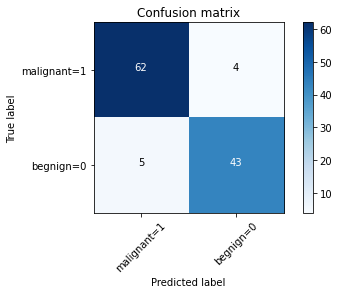

In [15]:
import matplotlib.pyplot as plt
matrix=confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(matrix, classes=['malignant=1','begnign=0'],normalize= False,  title='Confusion matrix')

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import jaccard_similarity_score
print("Jaccard index / Accuracy: ",jaccard_similarity_score(y_test, y_pred))
print("Sensitivity: ",62/(62+4))
print("Specificity: ",43/(43+5))
print("AUC: ",roc_auc_score(y_test,y_pred))

Jaccard index / Accuracy:  0.9210526315789473
Sensitivity:  0.9393939393939394
Specificity:  0.8958333333333334
AUC:  0.9176136363636365


Not bad.

Let's try logistic regression with TensorFlow and see if we can do even better.

<a id='logistic_w/_tensorflow'></a>
### III. Logistic regression with TensorFlow

**Restart the kernel and re-run (1) to (6).** For the TensorFlow model, we are going to one-hot encode the target variable y.

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
y=pd.DataFrame(enc.fit_transform(y).toarray())
y.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


Split the data into train and test sets.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [11]:
import tensorflow as tf
# numFeatures is the number of features in our input data.
numFeatures = X_train.shape[1]

# numLabels is the number of classes our data points can be in.
numLabels = y_train.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) 
yGold = tf.placeholder(tf.float32, [None, numLabels]) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

In [12]:
weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.001,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.001,
                                    name="bias"))

In [13]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [30]:
# Number of Epochs in our training
numEpochs = 50000

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0001,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.9,
                                          staircase=True)

In [31]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [32]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

In [33]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [47]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: X_train, yGold: y_train})
        # Report occasional stats
        if i % 1000 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: X_train, yGold: y_train})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: X_test, 
                                                                yGold: y_test})))

step 0, training accuracy 0.973626, cost 11.0382, change in cost 11.0382
step 1000, training accuracy 0.975824, cost 11.0186, change in cost 0.0195704
step 2000, training accuracy 0.978022, cost 11.0001, change in cost 0.0185127
step 3000, training accuracy 0.978022, cost 10.9825, change in cost 0.0175896
step 4000, training accuracy 0.978022, cost 10.9658, change in cost 0.0167112
step 5000, training accuracy 0.978022, cost 10.9498, change in cost 0.0159922
step 6000, training accuracy 0.978022, cost 10.9345, change in cost 0.0152845
step 7000, training accuracy 0.978022, cost 10.9198, change in cost 0.0146837
step 8000, training accuracy 0.978022, cost 10.9057, change in cost 0.0141373
step 9000, training accuracy 0.978022, cost 10.8921, change in cost 0.013607
step 10000, training accuracy 0.978022, cost 10.8789, change in cost 0.0131798
step 11000, training accuracy 0.978022, cost 10.8662, change in cost 0.0127287
step 12000, training accuracy 0.978022, cost 10.8538, change in cost

The logistic model with TensorFlow yielded a slightly higher accuracy than the regular logistic model: 2.63% higher.

Let's compute the sensitivity and specificity as well.

"sess.run" compares the predicted label with the actual label and outputs True for correct predictions and False for incorrect predictions.

In [59]:
array=sess.run(correct_predictions_OP,feed_dict={X:X_test,yGold:y_test})
pred=pd.DataFrame(data=array, columns=["Correct=True"])
pred

,Correct=True
0,True
1,True
2,True
3,True
4,True
...,...
109,True
110,True
111,True
112,True


In [60]:
incorrect=pred[pred["Correct=True"] != True]
incorrect

,Correct=True
6,False
28,False
47,False
62,False
64,False
81,False


The model missed rows 6, 28,47,62,64,81. Let's output the actual labels of those rows.

In [62]:
y_test.iloc[[6,28,47,62,64,81]]

,0,1
385,0.0,1.0
340,1.0,0.0
135,0.0,1.0
297,0.0,1.0
86,0.0,1.0
484,1.0,0.0


Out of the 6 instances that the model  missed, 4 of them were actually "malignant" but were predicted to "benign", 2 were actually "benign" but were predicted to be "malignant". Hence, False Negative is 4, False Positive is 2. 

In [27]:
positive=pd.DataFrame(y_test.iloc[:,1]==1).rename(columns={1:"PorN"})
positive

,PorN
14,True
334,False
457,False
101,False
346,False
...,...
277,True
109,False
547,False
361,False


In [25]:
length_1=len(positive[positive["PorN"]==True])
length_1

48

There are 48 positive cases in the test data. That means the number of negative cases is 66. Hence, we got out confusion matrix to be:

In [30]:
print("The confusion matrix: \n",np.array([[44,4],[2,64]]))

The confusion matrix: 
 [[44  4]
 [ 2 64]]


(That was a good skills exercise as well as brain exercise. Mannualy computing the confusion matrix requires understanding of each of its components. It requires strategies as wll.)

In [31]:
print("Sensitivity is: ", 44/(44+4))
print("Specificity is: ", 64/(64+2))

Sensitivity is:  0.9166666666666666
Specificity is:  0.9696969696969697


|Accuracy|Sensitivity|Specificity|
|--------|-----------|-----------|
|0.94736844|0.9166666666666666|0.9696969696969697|

Not bad at all.

Let's try decision tree and see what we can get. 

<a id='random_forest'></a>
### IV. Random Forest Decision Tree

**Restart the kernel and re-run (1) to (6).** For the decision tree model, we do not need to encode the target variable.

Split the data into train and test sets. We are going to use the same proportion as before: train:test=0.8:0.2

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [27]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(criterion="entropy", max_depth = 5)
RandomForest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
RandomForest.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
y_pred = RandomForest.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B'], dtype=object)

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9298245614035088


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,y_pred))

[[70  4]
 [ 4 36]]


Confusion matrix, without normalization
[[70  4]
 [ 4 36]]


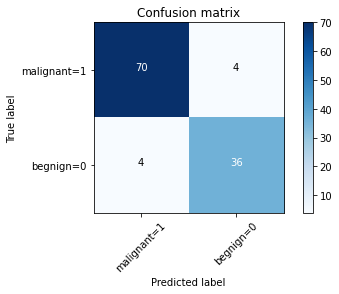

In [32]:
import matplotlib.pyplot as plt
matrix=confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(matrix, classes=['malignant=1','begnign=0'],normalize= False,  title='Confusion matrix')

In [34]:
from sklearn.metrics import jaccard_similarity_score
print("Jaccard index / Accuracy: ",jaccard_similarity_score(y_test, y_pred))
print("Sensitivity: ",70/(70+4))
print("Specificity: ",36/(36+4))

Jaccard index / Accuracy:  0.9298245614035088
Sensitivity:  0.9459459459459459
Specificity:  0.9


Not the best model so far, but not bad at all.

<a id='svm'></a>
### V. Support Vector Machine (SVM) for classification

In [74]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
y_pred=model.predict(X_test)
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

SVM's Accuracy:  0.9122807017543859


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,y_pred))

[[70  4]
 [ 6 34]]


Confusion matrix, without normalization
[[70  4]
 [ 6 34]]


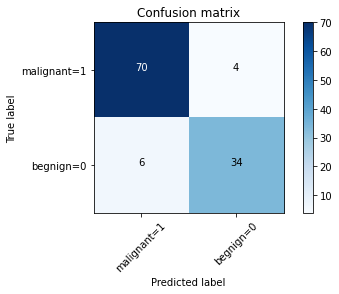

In [77]:
import matplotlib.pyplot as plt
matrix=confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(matrix, classes=['malignant=1','begnign=0'],normalize= False,  title='Confusion matrix')

In [78]:
from sklearn.metrics import jaccard_similarity_score
print("Jaccard index / Accuracy: ",jaccard_similarity_score(y_test, y_pred))
print("Sensitivity: ",70/(70+4))
print("Specificity: ",34/(34+6))

Jaccard index / Accuracy:  0.9122807017543859
Sensitivity:  0.9459459459459459
Specificity:  0.85


Not the best one, but not bad.

So far, the logistic model with TensorFlow has the best performance. We are going to build one more model: neural network for classification.

<a id='neural_network_w/_keras'></a>
### VI. Neural network for classification.

**Restart the kernel and re-run (1) to (6).** For the neural network model, we need to one-hot encode the target variable.

In [9]:
from sklearn.preprocessing import OneHotEncoder
ienc=OneHotEncoder(handle_unknown="ignore")
y=ienc.fit_transform(y)
y=pd.DataFrame(y.toarray())
y.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(455, 15)
(114, 15)


In [110]:
length=X_train.shape[1]
num_classes=y_test.shape[1]

In [111]:
# Load the libraries
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="tanh"))
    model.add(Dense(num_classes, activation='softmax'))
      
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [116]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=25, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 455 samples, validate on 114 samples
Epoch 1/25
 - 5s - loss: 0.5054 - acc: 0.8132 - val_loss: 0.3082 - val_acc: 0.9649
Epoch 2/25
 - 0s - loss: 0.2537 - acc: 0.9099 - val_loss: 0.1258 - val_acc: 0.9737
Epoch 3/25
 - 0s - loss: 0.1845 - acc: 0.9231 - val_loss: 0.0893 - val_acc: 0.9737
Epoch 4/25
 - 0s - loss: 0.1605 - acc: 0.9319 - val_loss: 0.0782 - val_acc: 0.9649
Epoch 5/25
 - 0s - loss: 0.1437 - acc: 0.9429 - val_loss: 0.0796 - val_acc: 0.9737
Epoch 6/25
 - 0s - loss: 0.1404 - acc: 0.9363 - val_loss: 0.0679 - val_acc: 0.9649
Epoch 7/25
 - 0s - loss: 0.1286 - acc: 0.9538 - val_loss: 0.0649 - val_acc: 0.9649
Epoch 8/25
 - 0s - loss: 0.1208 - acc: 0.9582 - val_loss: 0.0686 - val_acc: 0.9737
Epoch 9/25
 - 0s - loss: 0.1100 - acc: 0.9604 - val_loss: 0.0565 - val_acc: 0.9737
Epoch 10/25
 - 0s - loss: 0.1116 - acc: 0.9604 - val_loss: 0.0661 - val_acc: 0.9825
Epoch 11/25
 - 0s - loss: 0.0995 - acc: 0.9648 - val_loss: 0.0607 - val_acc: 0.9737
Epoch 12/25
 - 0s - loss: 0.0962 - acc:

[0.07650765335481417, 0.9824561403508771]

The model above is a multilabel neural network classification model, but it apparently worked very well on this dataset. To compute the confusion matrix, I needed the multilabel confusion matrix, for which I kept getting an import error when running the line "from sklearn.metrics import multilabel_confusion_matrix". The binary "confusion_matrix" cannot accomodate the output of a multilabel model. So, I am going to mannualy compute the confusion matrix.

In [168]:
y_test=np.asarray(y_test)
y_test=pd.DataFrame(y_test)
y_test.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


Join the actual labels and the predicted labels for comparison later on.

In [169]:
y_pred=round(pd.DataFrame(model.predict(X_test)),1)
comparison=pd.concat([y_test,y_pred],axis=1,ignore_index=True).rename(columns={0:"actual_0",1:"actual_1",2:"pred_0",3:"pred_1"})
comparison

,actual_0,actual_1,pred_0,pred_1
0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
109,1.0,0.0,1.0,0.0
110,0.0,1.0,0.0,1.0
111,1.0,0.0,1.0,0.0
112,1.0,0.0,1.0,0.0


Output the rows where the actual labels are not the same as the predicted labels.

In [170]:
import numpy as np
missed=np.where(comparison["actual_1"]!=comparison["pred_1"])
missed

(array([ 8, 20, 36, 37, 44, 55, 65, 77]),)

In [171]:
missed=comparison[["actual_1","pred_1"]].loc[[8,20,36,37,44,55,65,77],:]
missed

,actual_1,pred_1
8,0.0,1.0
20,1.0,0.9
36,1.0,0.9
37,0.0,0.4
44,0.0,0.1
55,0.0,0.1
65,0.0,0.7
77,1.0,0.9


With a threshold of 0.5, i.e., a probability above 0.5 will be considered positive and given the label "1", a probability below 0.5 will be considered negative and given the label "0", there are only two instances the model missed: row 8 and row 65. This echoes the accuracy of 0.9825: 114 - 114(0.9825)=2. 

For both instances, the actual class is "benign", but the model predicted it to be "malignant". So, the false positive is 2.

Let's see how many positive instances are in the test data. 

In [184]:
y_test_1=y_test[y_test.iloc[:,1]==1]
length_1=len(y_test_1)
length_1

43

There are 43 positive instances in the test data, that means the number of negative instances in 71 (=114-43). False positive is 2, that means true negative is 69 (=71-2). We have just mannually computed the confusion matrix. That was a good skill exercise as well as brain exercise. Mannualy computing the confusion matrix requires one to truely understand the confusion matrix and strategies to derive the numbers as well.

In [2]:
import numpy as np
print("Confusion matrix: \n",np.array([[43,0],[2,69]]))

Confusion matrix: 
 [[43  0]
 [ 2 69]]


Sensitivity is true positive divided by the total number of positives in the data. There are 43 positive cases in the test data and two of them were falsely classified, so true positive is 41. None of the negative classes were mis-classified. So, true negative is 114 - 43 = 71, same as the total number of negatives in the test data. Specificity is true negative divided by the total number of negatives.

In [3]:
print("Sensitivity is: ",(43)/(43+0))
print("Specificity is: ",69/(69+2))

Sensitivity is:  1.0
Specificity is:  0.971830985915493


|Accuracy|Sensitivity|Specificity|
|--------|-----------|-----------|
|0.9824561|1.0|0.971830985915493|

Out of the five models, the neural network model delivered the best performance. The neural network model does not have a perfect accuracy. However, for prevention purpose, the model is perfect. It correctly predicted all the malignant cases. 